In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
accidents_dataset = pd.read_csv("/Users/mansipravinthanki/Downloads/US_Accidents_Dec21_updated.csv", na_values='')
display(accidents_dataset.head())

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


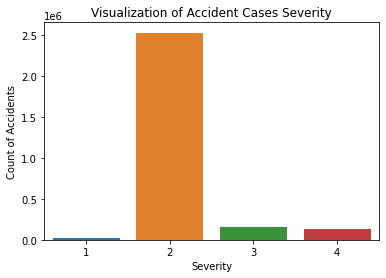

In [3]:
sns.countplot(x='Severity', data=accidents_dataset)
plt.xlabel('Severity')
plt.ylabel('Count of Accidents')
plt.title('Visualization of Accident Cases Severity')
plt.show()

In [4]:
accidents_dataset.rename(columns={'Visibility(mi)': 'Visibility', 'Wind_Speed(mph)': 'Wind_Speed'}, inplace=True)
display(accidents_dataset.head())

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


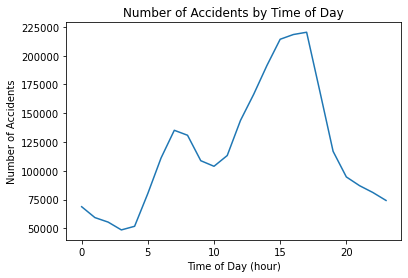

In [5]:
accidents_dataset['hour'] = pd.to_datetime(accidents_dataset['Start_Time']).dt.hour
hourly_counts = accidents_dataset.groupby('hour').size().reset_index(name='count')
sns.lineplot(x='hour', y='count', data=hourly_counts)
plt.title('Number of Accidents by Time of Day')
plt.xlabel('Time of Day (hour)')
plt.ylabel('Number of Accidents')
plt.show()

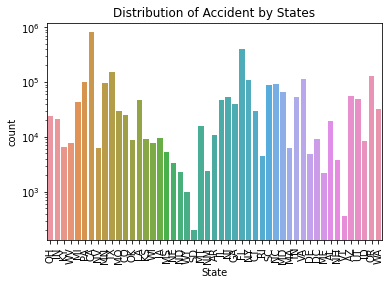

In [6]:
sns.countplot(x='State', data=accidents_dataset)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Distribution of Accident by States')
plt.show()

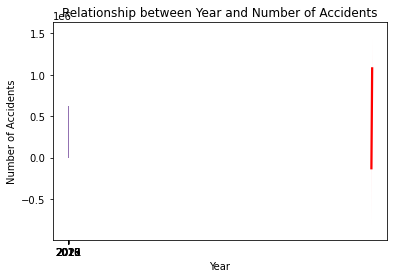

In [7]:
accidents_dataset['Year'] = pd.to_datetime(accidents_dataset['Start_Time']).dt.year
yearly_counts = accidents_dataset.groupby('Year').size().reset_index(name='AccidentCount')
sns.barplot(x='Year', y='AccidentCount', data=yearly_counts, ci=None)
sns.regplot(x='Year', y='AccidentCount', data=yearly_counts, scatter=False, color='red')
plt.title('Relationship between Year and Number of Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

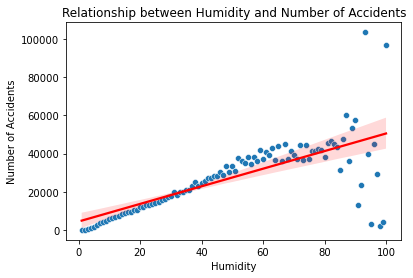

In [8]:
humidity_counts = accidents_dataset.groupby('Humidity(%)').size().reset_index(name='AccidentCount')
sns.scatterplot(x='Humidity(%)', y='AccidentCount', data=humidity_counts)
sns.regplot(x='Humidity(%)', y='AccidentCount', data=humidity_counts, scatter=False, color='red')
plt.title('Relationship between Humidity and Number of Accidents')
plt.xlabel('Humidity')
plt.ylabel('Number of Accidents')
plt.show()